In [1]:
import control 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
s = control.TransferFunction.s
PATH = '../Img'

In [3]:
def image_path( name ):
    return f'{PATH}/{name}.png'

## Ejercicio 1

In [4]:
A = np.array( [[0 , 1], [-1, 0] ] )
B = np.array( [ [ 0, 1 ] ] )
C = np.array( [0, 1] )
D = np.array( [ 0 ] )

In [5]:
G_a = control.StateSpace( A, B.T, C, D )

In [6]:
G_a_d = control.c2d( G_a, np.pi, 'zoh' )
G_a_d

A = [[-1.00000000e+00  2.35127499e-16]
 [-2.35127499e-16 -1.00000000e+00]]

B = [[2.00000000e+00]
 [2.35127499e-16]]

C = [[0. 1.]]

D = [[0.]]

dt = 3.141592653589793

In [7]:
A = np.array( [[0 , 1], [-2, -3] ] )
B = np.array( [ [ 0, 0 ], [ 3, 1 ] ] )
C = np.array( [1, 0] )
D = np.array( [ 0, 0 ] )

In [13]:
G_b = control.StateSpace( A, B, C, D )

### Resuelvo el sistema de ecuaciones del inciso b)

In [8]:
A = np.array( [ [ 1, 1, 1 ], [ 3, 1, 2 ], [2, 0, 0] ] )
b = np.array( [[ 0, 1, 3 ]] ).T
np.linalg.inv(A).dot(b)

array([[ 1.5],
       [ 0.5],
       [-2. ]])

In [11]:
G_b = ( s + 3 ) / ( s ** 2 + 3 * s + 2  )
G_b


    s + 3
-------------
s^2 + 3 s + 2

In [13]:
control.c2d( G_b, 1, 'zoh' )


   0.8319 z - 0.01205
------------------------
z^2 - 0.5032 z + 0.04979

dt = 1

In [20]:
h = 1
alpha = lambda i: np.exp( -( 2 - i ) * h )
alphas = [ alpha(0), alpha(1), alpha(-1) ]
b = -4 * alphas[0] + alphas[1] + 3 * alphas[-1]
a = alphas[0] - 4 * alphas[1] + 3
a/2, b/2, - alphas[0] - alphas[1], alphas[0] * alphas[1]

(0.8319087592754217,
 -0.012050243335708324,
 -0.503214724408055,
 0.04978706836786395)

In [16]:
A = np.array( [[0 , 1, 0], [0, 0, 1], [0, 0, 0] ] )
B = np.array( [ [ 0, 0, 1 ] ] ).T
C = np.array( [1, 0, 0] )
D = np.array( [ 0 ] )

In [17]:
G_c = control.StateSpace( A, B, C, D )

In [18]:
control.c2d( G_c, 1, 'zoh' )

A = [[1.  1.  0.5]
 [0.  1.  1. ]
 [0.  0.  1. ]]

B = [[0.16666667]
 [0.5       ]
 [1.        ]]

C = [[1. 0. 0.]]

D = [[0.]]

dt = 1

## Ejercicio 2

In [35]:
h = 9
T = lambda h: h / 2 * np.array( [ [h, h], [2, -2] ] )
Phi = lambda h: np.array( [ [1, h], [0, 1] ] )
T_inv = lambda h: np.linalg.inv( T(h) )
T_inv(h).dot( Phi(h) ).dot(T(h))

array([[ 2., -1.],
       [ 1.,  0.]])

## Ejercicio 3

In [4]:
p = lambda h: np.exp(-a * h)

In [5]:
h = np.linspace( 0, 1, 2000 )
a = 2 
p_eval = p(h)

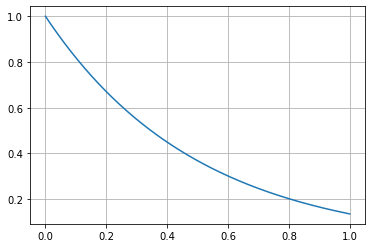

In [6]:
plt.plot( h, p_eval  )
plt.grid()


In [7]:
escalon = lambda t: np.piecewise(t, t>=0, [1, 0])
y = lambda t: -c*b/a * ( np.exp( -a * t ) - 1 ) * escalon( t )
y_k = lambda k: -c*b/a * ( np.exp(-a * h * k) - 1 ) * escalon( k - 1 )

In [17]:
t = np.linspace( 0, 10, 2000 )

In [18]:
a = 2
b = 1
c = 1

In [19]:
tao =  1 / a
hs = [tao, tao/10, 10 * tao  ]

In [24]:
ks = []
ys = []
for h in hs:
    k =  np.arange( 0, int( 10 / h ) + 1, 1 ) 
    ks.append( k )
    ys.append( y_k(k) )
    print(h)

0.5
0.05
5.0


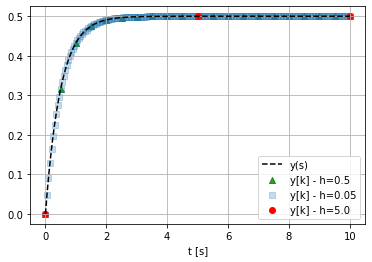

In [41]:
plt.plot( t, y(t), 'k--', label='y(s)' )

plt.scatter( ks[0] * hs[0], ys[0], c='g', label=f'y[k] - h={round(hs[0], 2)}', marker='^', alpha=.8)
plt.scatter( ks[1] * hs[1], ys[1],  label=f'y[k] - h={round(hs[1], 2)}', marker='s', alpha=.25 )
plt.scatter( ks[2] * hs[2], ys[2], c='r', label=f'y[k] - h={round(hs[2], 2)}' )

plt.xlabel('t [s]')
plt.grid()
plt.legend()
plt.savefig( image_path( '3-c' ) )

In [4]:
z = control.TransferFunction.z

In [7]:
H = (z) / ( z - 1 )
control.freqresp(H)

TypeError: freqresp() missing 1 required positional argument: 'omega'

<function control.delay.pade(T, n=1, numdeg=None)>

In [5]:
G

NameError: name 'G' is not defined